# IRTW001     Python Training: Level 2     Mini Data Analysis Project

#### This mini project aims to scrappe a website and collect reviews in order to perform the analysis of the gathered data including sentiment analysis

###### Importing needed libraries and browsing the intended website

In [1]:
from selenium import webdriver
PATH= r"C:\Users\Lenovo\Desktop\Python Workshop II\chromedriver.exe"
browser = webdriver.Chrome(executable_path = PATH)

In [2]:
URL = 'https://www.carmagazine.co.uk/car-reviews'
browser.get(URL)

In [108]:
import array as arr

###### Start of Data Scrapping: 

In [280]:
#Car brands/names collection from the website
car_brands = browser.find_elements_by_class_name('title')
list_of_car_brands = []
for i in range(640):
    list_of_car_brands.append(car_brands[i+1].text)

In [208]:
#Function to process element by element from the title to get the car brand 
def clean_brand_name(word):
    brand_name = list_of_car_brands[word]
    return brand_name

In [281]:
#Clean car brand name
list_of_brands = []
n=0

#Traverse the list to get element by element 
for i in list_of_car_brands:
    if i==0:
        one_word = clean_brand_name(0)
        n = n+1
    else:
        one_word = clean_brand_name(n)
        n = n+1
    
    #Split the title 
    this_word = [word for word in one_word.split('review') if word not in set(stopwords.words('english'))]
    #print(this_word)
    
    #Get the brand name from the title
    car_brand = this_word[0]
    
    #Lists of cleaned brands
    list_of_brands.append(car_brand)

###### Price Scrapping:

In [282]:
#Car prices collection 
car_price = browser.find_elements_by_class_name('price')
list_of_car_price = []
for i in range(640):
    if (not car_price):
        list_of_car_price.append(' ')
    else:
        list_of_car_price.append(car_price[i+1].text)

In [204]:
#Function to convert car price into integer
def convert_price(price):
    car_price = list_of_car_price[price]
    return car_price

In [283]:
#Covert price into numerical data type
prices =[]
m=0

for i in list_of_car_price:
    if i==0:
        other_word = convert_price(0)
        m = m+1
    else:
        other_word = convert_price(m)
        m = m+1
    
    that_word = [word for word in other_word.split(' ') if word not in set(stopwords.words('english'))]    
    
    price_without_currency = that_word[2][1:]
    price_without_currency = price_without_currency.replace(',', '')
    prices.append(int(price_without_currency))

###### Author Name Scrapping: 

In [284]:
#The author of the review
list_of_author = []
authors = browser.find_elements_by_class_name('author')
for i in range(640):
    list_of_author.append(authors[i].text)

###### Reviews Scrapping:

In [285]:
#Review description
list_of_reviews = []
reviews = browser.find_elements_by_class_name('desc')
for i in range(640):
    list_of_reviews.append(reviews[i].text)

###### Review Publishing Date Scrapping:

In [286]:
#Review Publishing date
list_of_review_dates = []
review_dates = browser.find_elements_by_class_name('date')
for i in range(640):
    list_of_review_dates.append(review_dates[i].text)

###### Review Rating Scrapping:

In [287]:
#Review ratings
list_of_stars = []
stars = browser.find_elements_by_class_name('ratings')
for i in range(640):
    list_of_stars.append(stars[i].text)

In [19]:
import nltk
from nltk.corpus import stopwords 

In [213]:
#Function to process element by element from the ratings 
def element_by_element(word):
    first_element = list_of_stars[word]
    return first_element

###### Rating Splitting:

In [288]:
list_of_stars_car = []
list_of_stars_handling = []
list_of_stars_performance = []
list_of_stars_usability = []
n=0

#Traverse the list to get element by element 
for i in list_of_stars:
    if i==0:
        one_word = element_by_element(0)
        n = n+1
    else:
        one_word = element_by_element(n)
        n = n+1
    
    #Split the ratings from their categories
    this_word = [word for word in one_word.split('\n') if word not in set(stopwords.words('english'))]
    
    #Split ratings
    car = this_word[2]
    handling = this_word[3]
    performance = this_word[4]
    usability = this_word[5]    
    
    #Lists of each rating by itself
    list_of_stars_car.append(car)
    list_of_stars_handling.append(handling)
    list_of_stars_performance.append(performance)
    list_of_stars_usability.append(usability)

###### Converting Ratings to Numerical Data:

In [215]:
#Function to convert car ratings into integers
def car_rating(rating):
    rating_element = list_of_stars_car[rating]
    return rating_element

In [216]:
#Function to convert handling ratings into integers
def handling_rating(rating):
    handling_rating = list_of_stars_handling[rating]
    return handling_rating

In [217]:
#Function to convert performance ratings into integers
def performance_rating(rating):
    performance_rating = list_of_stars_performance[rating]
    return performance_rating

In [218]:
#Function to convert usability ratings into integers
def usability_rating(rating):
    usability_rating = list_of_stars_usability[rating]
    return usability_rating

In [289]:
#Get just integers for usability ratings
usability_ratings =[]
m=0

for i in list_of_stars_usability:
    if i==0:
        other_word = usability_rating(0)
        m = m+1
    else:
        other_word = usability_rating(m)
        m = m+1
    
    that_word = [word for word in other_word.split(' ') if word not in set(stopwords.words('english'))]    
    usability_ratings.append(int(that_word[0]))

In [290]:
#Get just integers for car ratings
car_ratings =[]
m=0

for i in list_of_stars_car:
    if i==0:
        other_word = car_rating(0)
        m = m+1
    else:
        other_word = car_rating(m)
        m = m+1
    
    that_word = [word for word in other_word.split(' ') if word not in set(stopwords.words('english'))]    
    car_ratings.append(int(that_word[0]))

In [291]:
#Get just integers for performance ratings
performance_ratings =[]
m=0

for i in list_of_stars_performance:
    if i==0:
        other_word = performance_rating(0)
        m = m+1
    else:
        other_word = performance_rating(m)
        m = m+1
    
    that_word = [word for word in other_word.split(' ') if word not in set(stopwords.words('english'))]    
    performance_ratings.append(int(that_word[0]))

In [292]:
#Get just integers for handling ratings
handling_ratings =[]
m=0

for i in list_of_stars_handling:
    if i==0:
        other_word = handling_rating(0)
        m = m+1
    else:
        other_word = handling_rating(m)
        m = m+1
    
    that_word = [word for word in other_word.split(' ') if word not in set(stopwords.words('english'))]    
    handling_ratings.append(int(that_word[0]))

#### This is the end of data scrapping and the next phase is about data preperation, cleaning, and analysis.

###### Storing Data in a DataFrame:

In [224]:
import pandas as pd 
df = pd.DataFrame(list_of_brands, columns=['Car_Brand'])

In [225]:
df['Price in Pound'] = prices

In [228]:
df['Author'] = list_of_author

In [229]:
df['Date'] = list_of_review_dates
df['Car Rating'] = car_ratings
df['Handling Rating'] = handling_ratings
df['Performance Rating'] = performance_ratings
df['Usability Rating'] = usability_ratings
df['Review Description'] = list_of_reviews

###### A view of the built dataset:

In [230]:
df.head()

,Car_Brand,Price in Pound,Author,Date,Car Rating,Handling Rating,Performance Rating,Usability Rating,Review Description
0,Maserati MC20 (2021),187230,Georg Kacher,21 May 2021,5,5,5,3,"Arriving late to the performance car party, Ma..."
1,Ford Kuga SUV,37895,Keith WR Jones,21 May 2021,4,4,3,4,Third-generation Ford Kuga tested in hybrid guise
2,Ford Mustang Mach-E (2021),40350,Adam Binnie,21 May 2021,4,3,4,4,A Model T for a new age? Our first UK test of ...
3,Lexus ES (2021),34705,Jake Groves,18 May 2021,4,4,3,3,We try out Lexus’s mid-size saloon with its ow...
4,Mercedes-AMG CLA45 Shooting Brake (2021),54150,Jake Groves,17 May 2021,4,5,5,4,Want all of the power and drift magic of the A...


In [231]:
df.shape

(640, 9)

###### Saving dataset to cvs and excel files:

In [232]:
df.to_excel(r'C:\Users\Lenovo\Desktop\Python Workshop II\Car_Reviews_Excel.xlsx')

In [233]:
df.to_csv(r'C:\Users\Lenovo\Desktop\Python Workshop II\Collected_Car_Reviews.csv')

###### Importing libraries needed for data visualization and analysis:

In [234]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import sort_dataframeby_monthorweek as sd
import plotly.express as px
import scipy.stats as stats
import plotly.graph_objects as go

###### Null Records Verification:

In [235]:
df.isnull()

,Car_Brand,Price in Pound,Author,Date,Car Rating,Handling Rating,Performance Rating,Usability Rating,Review Description
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
635,False,False,False,False,False,False,False,False,False
636,False,False,False,False,False,False,False,False,False
637,False,False,False,False,False,False,False,False,False
638,False,False,False,False,False,False,False,False,False


In [237]:
df.isnull().sum()

Car_Brand             0
Price in Pound        0
Author                0
Date                  0
Car Rating            0
Handling Rating       0
Performance Rating    0
Usability Rating      0
Review Description    0
dtype: int64

###### Duplicates Check Up:

In [241]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
635    False
636    False
637    False
638    False
639    False
Length: 640, dtype: bool

In [242]:
df.duplicated().sum()

0

###### Dataset Descriptives:

In [243]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Price in Pound,640.0,89984.098437,199424.188553,160.0,28452.5,44062.0,85682.5,2600000.0
Car Rating,640.0,3.835938,1.023796,0.0,4.0,4.0,4.0,5.0
Handling Rating,640.0,3.707813,1.082194,0.0,3.0,4.0,4.0,5.0
Performance Rating,640.0,3.789062,1.159113,0.0,3.0,4.0,5.0,5.0
Usability Rating,640.0,3.676563,1.093478,0.0,3.0,4.0,4.0,5.0


In [256]:
author_group = df.groupby('Author')['Car_Brand'].count()
author_group

Author
Adam Binnie                 35
Alex Goy                     1
Andrew English               1
Anthony ffrench-Constant     6
Ben Barry                   34
                            ..
and Lawrence Cheung          2
and Murray Scullion          2
and Phil McNamara            2
and Tim Pollard              4
and Tom Goodlad              2
Name: Car_Brand, Length: 67, dtype: int64

###### Author Frequency Diagrams:

<AxesSubplot:xlabel='Author'>

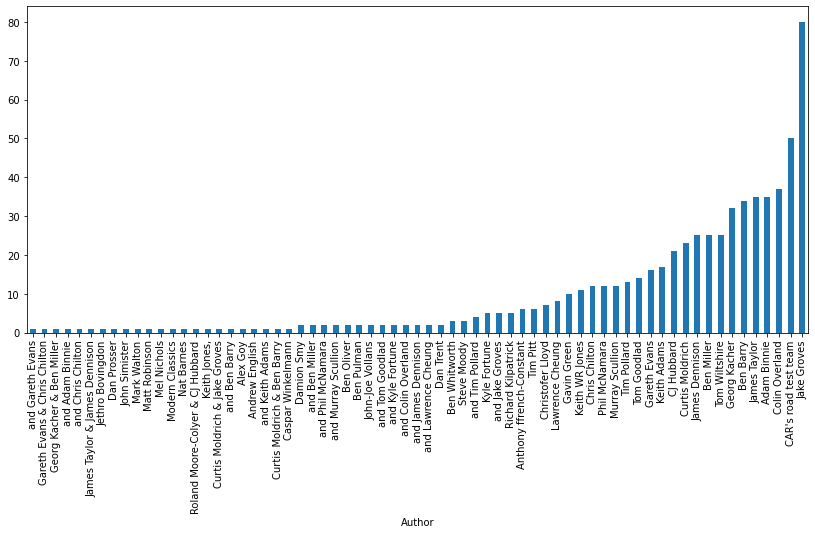

In [262]:
plt.figure(figsize=(14,6))
author_group.sort_values().plot.bar()

<AxesSubplot:xlabel='Author', ylabel='count'>

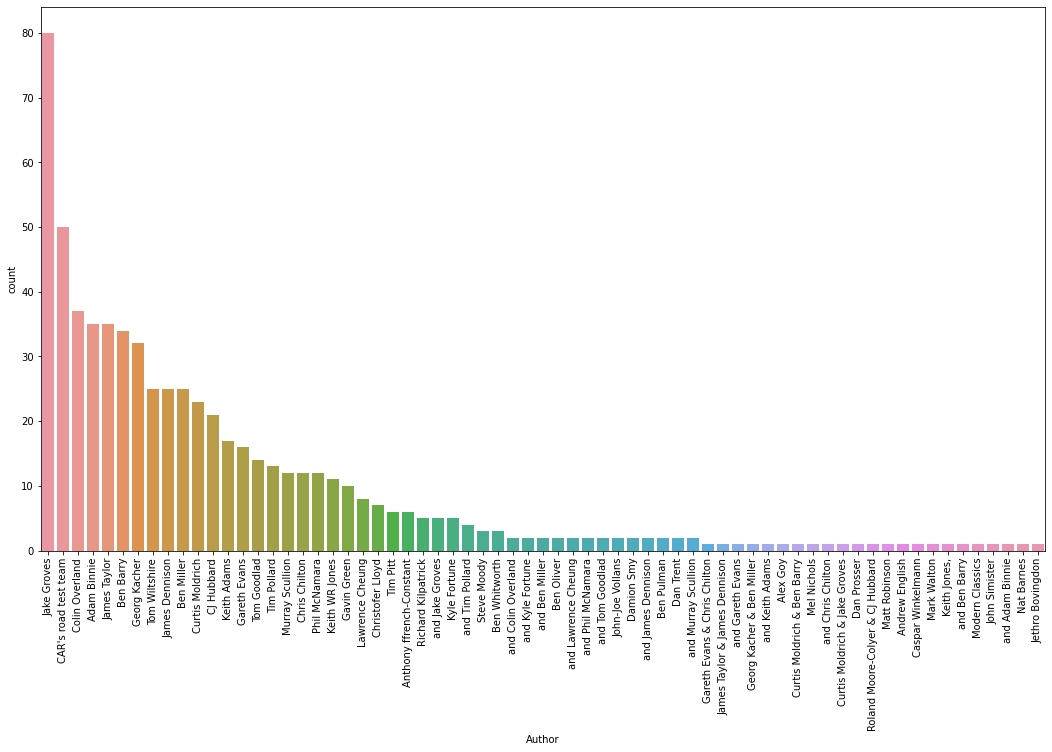

In [266]:
plt.rcParams['figure.figsize'] = (18.0, 10.0)
plt.xticks(rotation=90)
sns.countplot(x="Author", data=df, order = df['Author'].value_counts().index)

###### Rating Categories Box Plots:

In [250]:
fig=px.box(df,y=['Car Rating', 'Handling Rating', 'Performance Rating', 'Usability Rating'])
fig.show()

<AxesSubplot:>

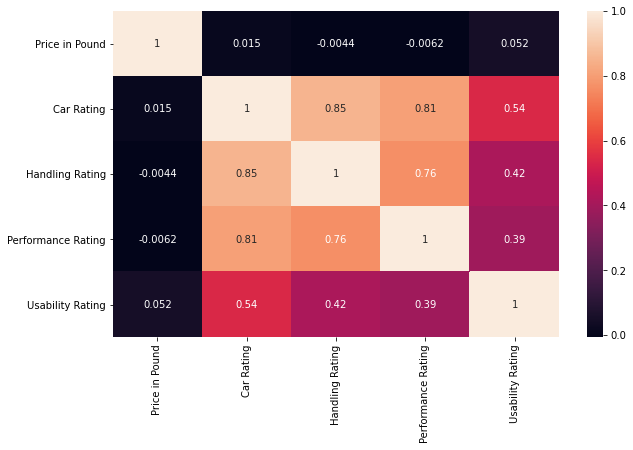

In [251]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True)

###### Sentiment Analysis:

In [275]:
from nltk.sentiment import SentimentIntensityAnalyzer
polarity =[]
sia = SentimentIntensityAnalyzer()
for i in range(640):
    polarity.append(sia.polarity_scores(df['Review Description'][i]))
polarity

[{'neg': 0.0, 'neu': 0.688, 'pos': 0.312, 'compound': 0.6124},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 0.925, 'pos': 0.075, 'compound': 0.0772},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 0.784, 'pos': 0.216, 'compound': 0.5106},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 0.571, 'pos': 0.429, 'compound': 0.7184},
 {'neg': 0.351, 'neu': 0.649, 'pos': 0.0, 'compound': -0.4019},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 0.642, 'pos': 0.358, 'compound': 0.7708},
 {'neg': 0.0, 'neu': 0.764, 'pos': 0.236, 'compound': 0.5719},
 {'neg': 0.167, 'neu': 0.833, 'pos': 0.0, 'compound': -0.4215},
 {'neg': 0.075, 'neu': 0.751, 'pos': 0.174, 'compound': 0.4549},
 {'neg': 0.0, 'neu': 0.61, 'pos': 0.39, 'compound': 0.6597},
 {'neg': 0.0, 'neu': 1.0, 'pos':

In [278]:
len(polarity)

640

In [274]:
sia.polarity_scores(df['Review Description'][639])

{'neg': 0.0, 'neu': 0.732, 'pos': 0.268, 'compound': 0.5106}

In [276]:
from textblob import TextBlob

In [277]:
polarity_score=[]
for i in df['Review Description']:
    try:
        polarity_score.append(TextBlob(i).sentiment.polarity)
    except:
        polarity_score.append(0)
polarity_score

[-0.04999999999999999,
 0.0,
 0.17424242424242423,
 0.3,
 0.5,
 0.0,
 0.4,
 0.0,
 0.5,
 -0.25,
 0.0,
 0.3416666666666666,
 0.0,
 0.0,
 0.16203703703703703,
 0.02083333333333333,
 0.25,
 0.3,
 0.4,
 0.25,
 0.07367424242424242,
 0.0,
 0.3,
 0.06818181818181818,
 0.0,
 0.0,
 0.16666666666666669,
 0.0,
 0.13636363636363635,
 0.13636363636363635,
 0.19318181818181818,
 0.0,
 0.5,
 0.5,
 0.0,
 0.5,
 0.0,
 0.13636363636363635,
 0.13636363636363635,
 0.3,
 0.25,
 0.25,
 0.25,
 0.3431818181818182,
 0.08541666666666668,
 0.0,
 0.06666666666666665,
 0.0,
 0.35,
 0.0,
 0.35,
 0.3181818181818182,
 0.0,
 0.24545454545454545,
 0.0,
 0.0,
 0.13636363636363635,
 0.35,
 0.13636363636363635,
 0.25,
 -0.2916666666666667,
 -0.03181818181818183,
 0.4,
 0.5,
 0.5,
 0.13636363636363635,
 0.35,
 0.0,
 0.25,
 -0.4,
 0.52,
 0.10714285714285714,
 0.4,
 0.21212121212121213,
 0.0,
 0.31212121212121213,
 0.0,
 0.8,
 0.5,
 0.3,
 0.3333333333333333,
 0.4380952380952381,
 0.0,
 0.0,
 0.09999999999999998,
 -0.1555555555

In [279]:
len(polarity_score)

640

In [294]:
comment_words = ' '.join(df['Review Description'])

In [296]:
from wordcloud import WordCloud,STOPWORDS

In [297]:
stopwords = set(STOPWORDS)

(-0.5, 1399.5, 799.5, -0.5)

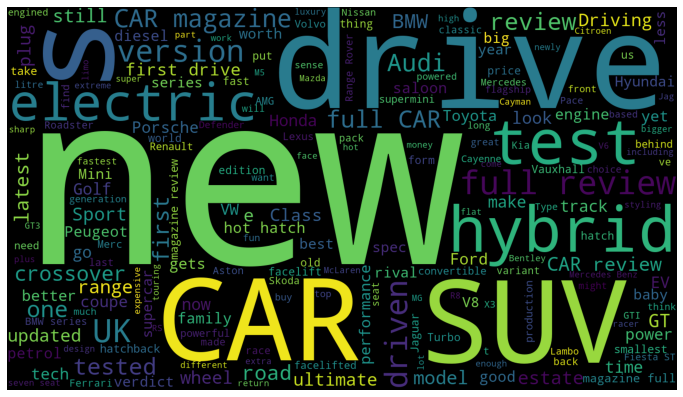

In [301]:
wordcloud = WordCloud(width=1400,height=800,stopwords=stopwords).generate(comment_words)
plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis('off')

###### All Authors:

In [303]:
author_groups=df['Author'].value_counts()
author_groups.index

Index(['Jake Groves', 'CAR's road test team', 'Colin Overland', 'Adam Binnie',
       'James Taylor', 'Ben Barry', 'Georg Kacher', 'Tom Wiltshire',
       'James Dennison', 'Ben Miller', 'Curtis Moldrich', 'CJ Hubbard',
       'Keith Adams', 'Gareth Evans', 'Tom Goodlad', 'Tim Pollard',
       'Murray Scullion', 'Chris Chilton', 'Phil McNamara', 'Keith WR Jones',
       'Gavin Green', 'Lawrence Cheung', 'Christofer Lloyd', 'Tim Pitt',
       'Anthony ffrench-Constant', 'Richard Kilpatrick', 'and Jake Groves',
       'Kyle Fortune', 'and Tim Pollard', 'Steve Moody', 'Ben Whitworth',
       'and Colin Overland', 'and Kyle Fortune', 'and Ben Miller',
       'Ben Oliver', 'and Lawrence Cheung', 'and Phil McNamara',
       'and Tom Goodlad', 'John-Joe Vollans', 'Damion Smy',
       'and James Dennison', 'Ben Pulman', 'Dan Trent', 'and Murray Scullion',
       'Gareth Evans & Chris Chilton', 'James Taylor & James Dennison',
       'and Gareth Evans', 'Georg Kacher & Ben Miller', 'and Keith A

In [304]:
fig = px.pie(df, values=author_groups, names=author_groups.index, title='Authors Name Based on Number of Published Reviews')
fig.show()